In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn import metrics


In [2]:
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [6]:
cname=data.columns
for i in range(len(cname)):
    print("The attribute",cname[i]," has {} unique values".format(data[cname[i]].nunique()))

The attribute ID  has 5000 unique values
The attribute Age  has 45 unique values
The attribute Experience  has 47 unique values
The attribute Income  has 162 unique values
The attribute ZIP Code  has 467 unique values
The attribute Family  has 4 unique values
The attribute CCAvg  has 108 unique values
The attribute Education  has 3 unique values
The attribute Mortgage  has 347 unique values
The attribute Personal Loan  has 2 unique values
The attribute Securities Account  has 2 unique values
The attribute CD Account  has 2 unique values
The attribute Online  has 2 unique values
The attribute CreditCard  has 2 unique values


The attributes Income,CCAVG, and Mortgage are continous variables
ZIP Code is nominal variable
ID,Age,Experience,Family, Education are Ordinal variables
CD Account, Online, Credit Card, Securities, Personal Loan are Binary Variables 

Personal Loan is the target/Dependent attribute and others are independednt attributes

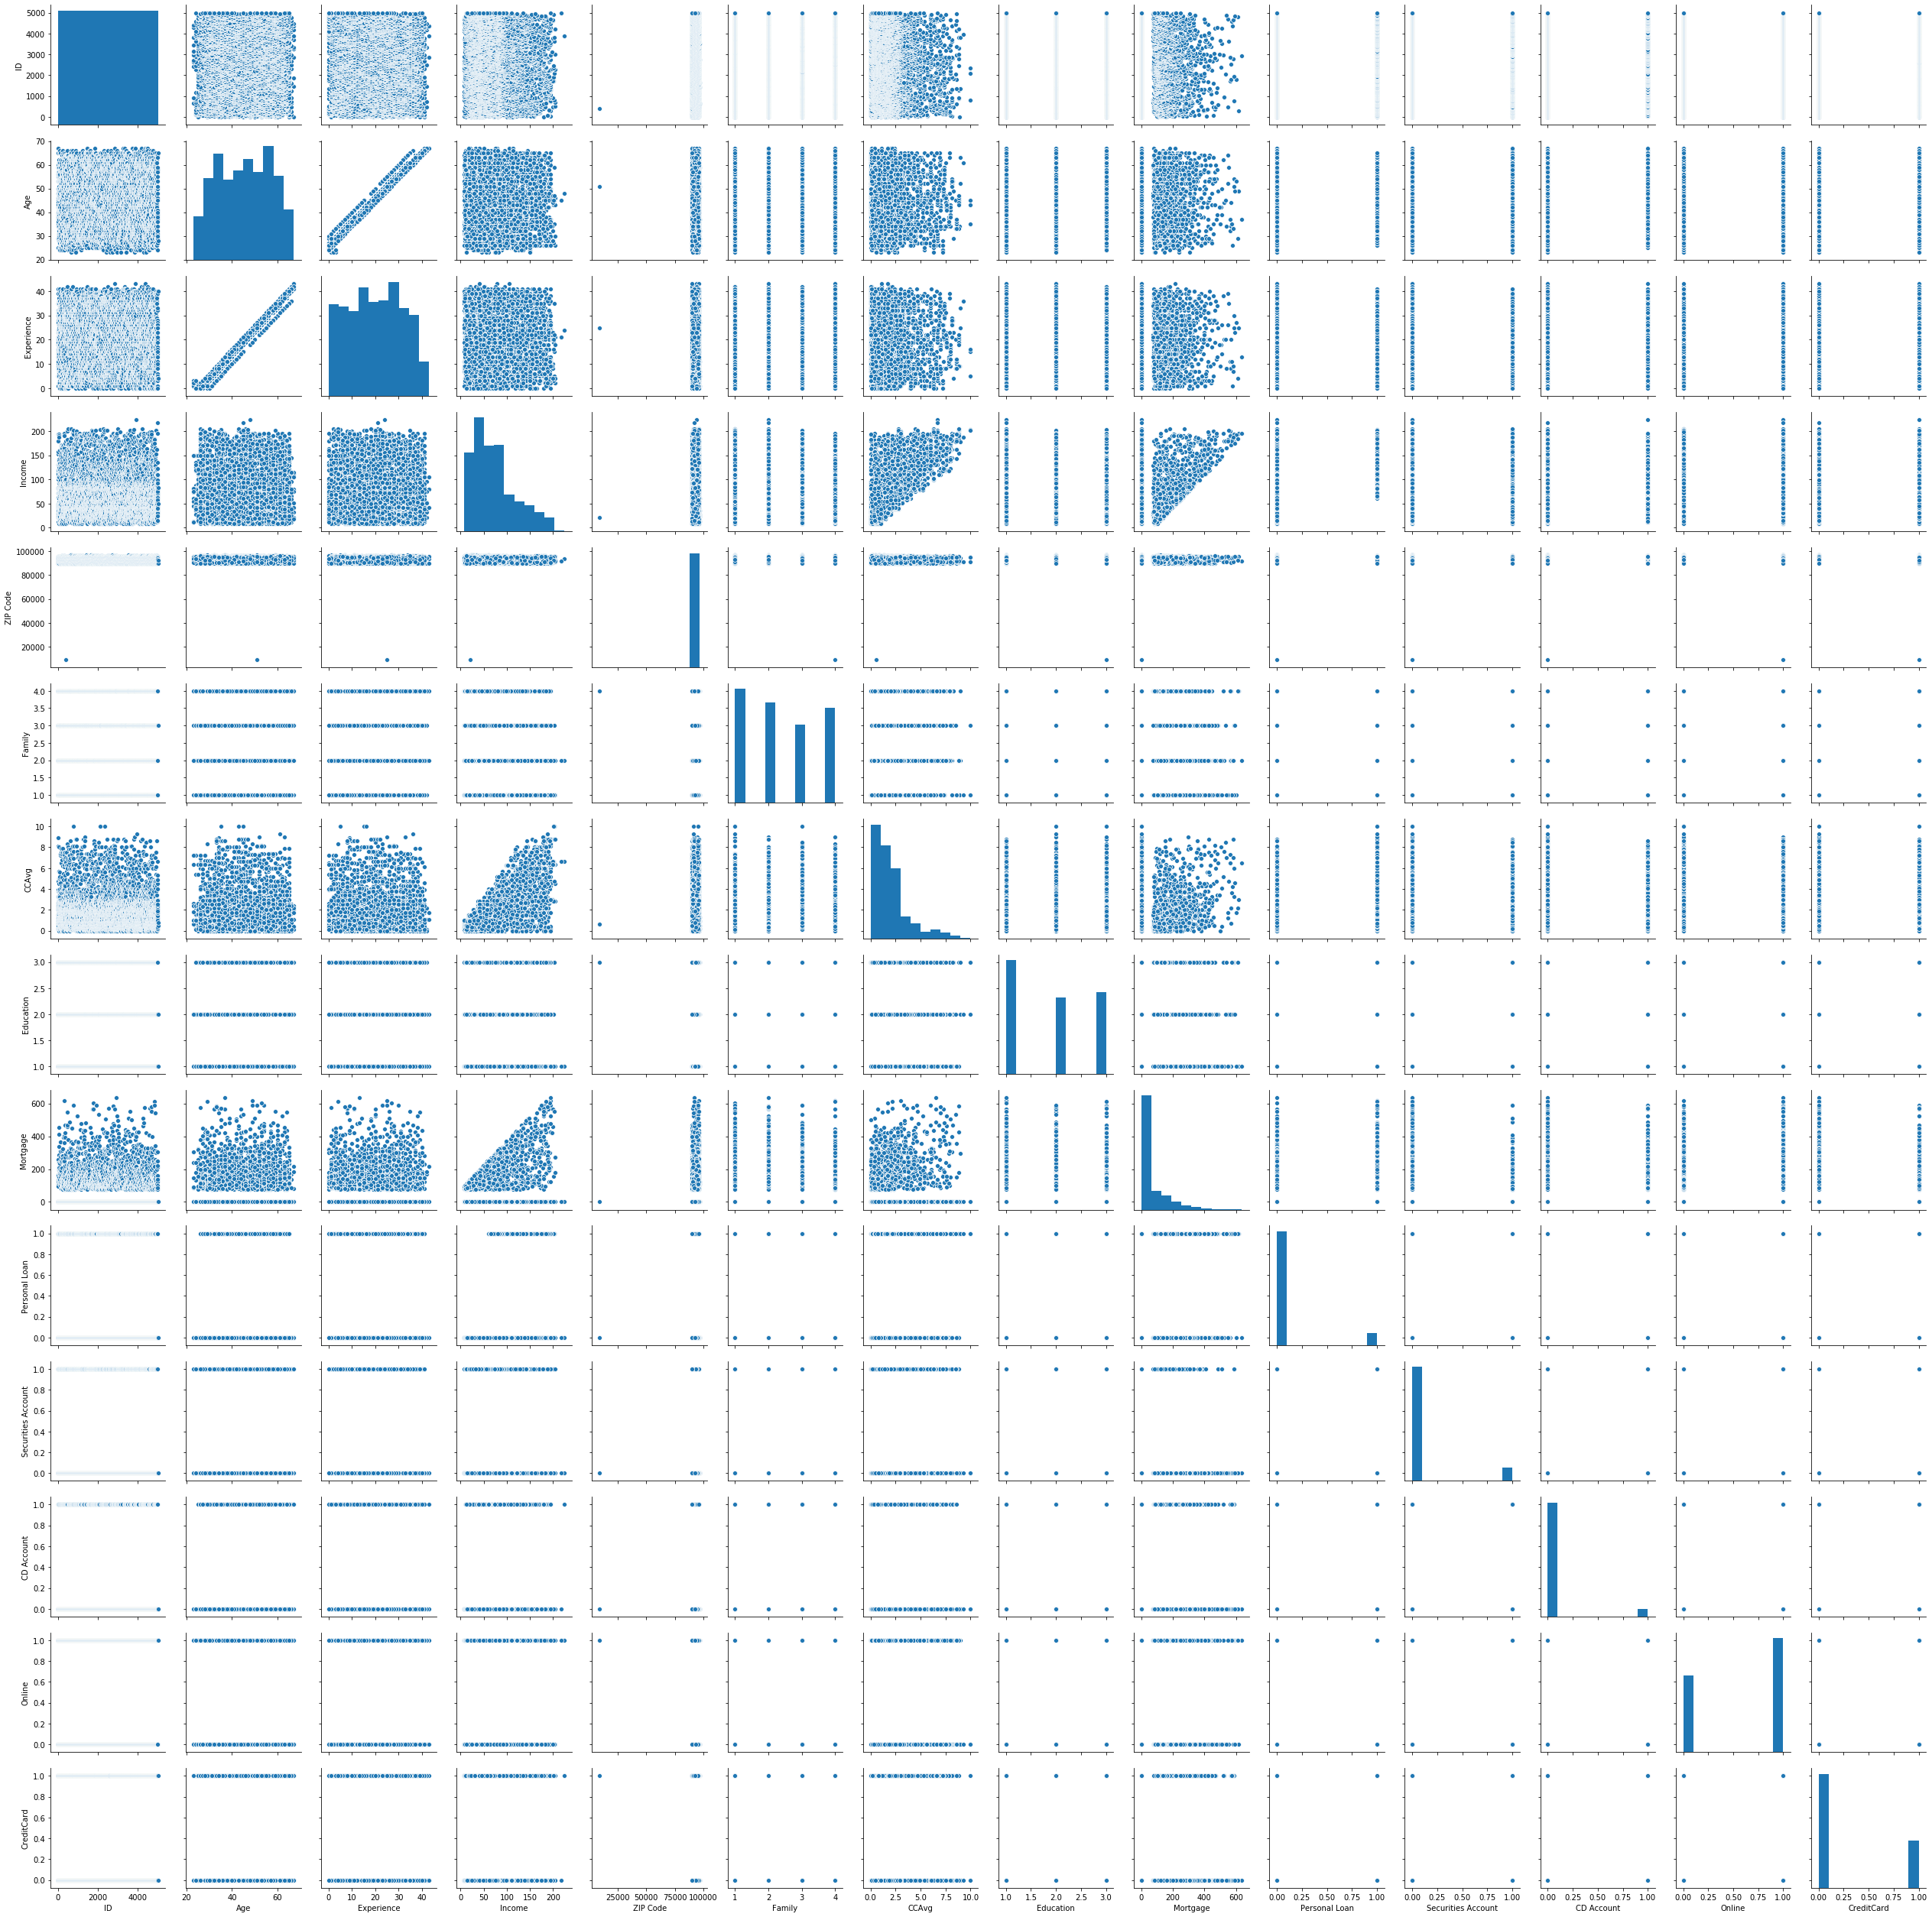

In [148]:
sns.pairplot(data)

# Age


Minimum Age is 23
Maximum Age is 67
Most frequent Age is 35
Mean Age is 45.3384
Mean Age is 45.0
Inter Quartile range is 20.0
Kurtosis is -1.1531142779719183


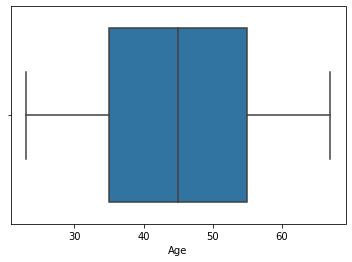

In [7]:
sns.boxplot(data['Age'],fliersize=10)
print("Minimum Age is {}".format(data['Age'].min()))
print("Maximum Age is {}".format(data['Age'].max()))
print("Most frequent Age is {}".format(data['Age'].mode().values[0]))
print("Mean Age is {}".format(data['Age'].mean()))
print("Mean Age is {}".format(data['Age'].median()))
print("Inter Quartile range is {}".format(data['Age'].quantile(0.75)-data['Age'].quantile(0.25)))
print("Kurtosis is {}".format(stats.kurtosis(data['Age'])))

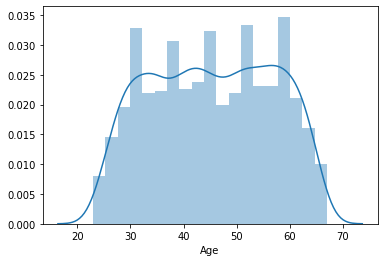

In [8]:
sns.distplot(data['Age'],kde=True)

The data has equal mean and median but a different mode. It has a negative kurtosis and hence a more flat curve.
Age is Distributed between the range of 23 and 64 with 45 unique values. 
The mean value of Age being 45.33, 
Most Common age being 35.
Since all the ages lie with 1.5 times the IQR, there are no Outliers. 


# Experience

Minimum Experience is -3
Maximum Experience is 43
Most frequent Experience is 32
Mean Experience is 20.1046
Inter Quartile range is 20.0
Kurtosis : -1.1216013372135318


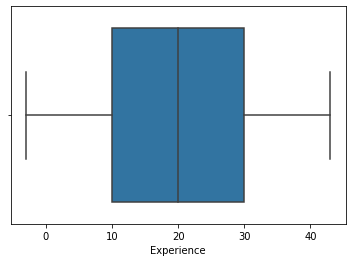

In [9]:
sns.boxplot(data['Experience'],fliersize=10)
print("Minimum Experience is {}".format(data['Experience'].min()))
print("Maximum Experience is {}".format(data['Experience'].max()))
print("Most frequent Experience is {}".format(data['Experience'].mode().values[0]))
print("Mean Experience is {}".format(data['Experience'].mean()))
print("Inter Quartile range is {}".format(data['Experience'].quantile(0.75)-data['Experience'].quantile(0.25)))
print("Kurtosis : {}".format(stats.kurtosis(data['Experience'])))

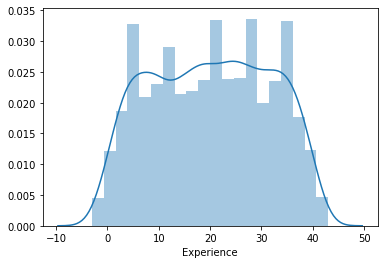

In [10]:
sns.distplot(data['Experience'],kde=True)

In [11]:
neg_experience=data[data['Experience']<0]
neg_experience.count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [12]:
data['Experience']=abs(data['Experience'])

The data has equal mean and median but a different mode. It has a negative kurtosis and hence a more flat curve.
Experience is Distributed between the range of -3 and 43 with 47 unique values. 
The mean value of Experience being 20.13, 
Most Common Experience being 32.
Since all the Experience lie with 1.5 times the IQR, there are no Outliers. 


Experience also has some negative values which can be an error while data entry. 
Using mean,median or mode on to replace the negative values can give result to abnormal results. 
Hence we choose to replace the negative value with the absolute value of the Experience as it matches with the Age

# Income

Minimum Income is 8
Maximum Income is 224
Most frequent Income is 44
Mean Income is 73.7742
Median Income is 64.0
Inter Quartile range is 59.0
Kurtosis is -0.045399717980349585


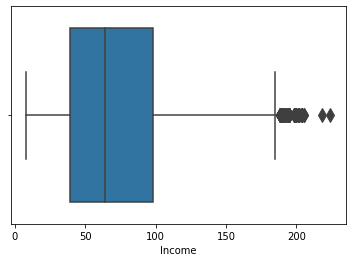

In [13]:
sns.boxplot(data['Income'],fliersize=10)
print("Minimum Income is {}".format(data['Income'].min()))
print("Maximum Income is {}".format(data['Income'].max()))
print("Most frequent Income is {}".format(data['Income'].mode().values[0]))
print("Mean Income is {}".format(data['Income'].mean()))
print("Median Income is {}".format(data['Income'].median()))
print("Inter Quartile range is {}".format(data['Income'].quantile(0.75)-data['Income'].quantile(0.25)))
print("Kurtosis is {}".format(stats.kurtosis(data['Income'])))

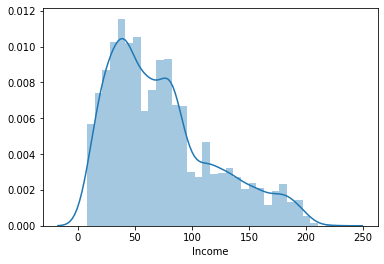

In [14]:
sns.distplot(data['Income'],kde=True)

The data is normally distributed with a Kurtosis value near to 0 and with 
right skew( tail of the skew extending towards the right) with mean>median>mode.

Income is Distributed between the range of 8K DOllars  and 224k Dollars with 162 unique values. 
The mean value of Income being 73.77, 
Most Common Income being 44.
There are outliers at higher incomes, which can be due to higher positions in the company. 


# ZipCode

In [15]:
print("Most frequent ZipCode is {}".format(data['ZIP Code'].mode().values[0]))
print("It has a frequency of {}".format(data[data['ZIP Code']==94720].Age.count()))

Most frequent ZipCode is 94720
It has a frequency of 169


From the above analysis, the 5000 User sample which are collected from 467 Unique PinCodes. 

Further analysis like Mean, Median etc doesnt make sense as it is a categorical variable with huge diversity. 

However the most common ZIP Code being 94720 as 169 samples are from that area.

# Family

In [16]:
print("Minimum Family Size is {}".format(data['Family'].min()))
print("Maximum Family Size is {}".format(data['Family'].max()))
print("Most frequent Family Size is {}".format(data['Family'].mode().values[0]))
print("Mean Family Size is {}".format(data['Family'].mean()))
print("Median Family Size is {}".format(data['Family'].median()))

for i in range(data['Family'].max()+1):
    print("There are {} families with Family Size {}".format(data[data['Family']==i].Family.count(),i))

Minimum Family Size is 1
Maximum Family Size is 4
Most frequent Family Size is 1
Mean Family Size is 2.3964
Median Family Size is 2.0
There are 0 families with Family Size 0
There are 1472 families with Family Size 1
There are 1296 families with Family Size 2
There are 1010 families with Family Size 3
There are 1222 families with Family Size 4


Family is a categorical variable with 4 different values 1,2,3 and 4. 
The most common family size is 1 

There are 1472 families with Family Size 1.
There are 1296 families with Family Size 2.
There are 1010 families with Family Size 3.
There are 1222 families with Family Size 4.

# Education

In [17]:
print("Minimum Education Size is {}".format(data['Education'].min()))
print("Maximum Education Size is {}".format(data['Education'].max()))
print("Most frequent Education Size is {}".format(data['Education'].mode().values[0]))
print("Mean Education Size is {}".format(data['Education'].mean()))
print("Median Education Size is {}".format(data['Education'].median()))

for i in range(data['Education'].max()+1):
    print("There are {} families with Education Size {}".format(data[data['Education']==i].Education.count(),i))

Minimum Education Size is 1
Maximum Education Size is 3
Most frequent Education Size is 1
Mean Education Size is 1.881
Median Education Size is 2.0
There are 0 families with Education Size 0
There are 2096 families with Education Size 1
There are 1403 families with Education Size 2
There are 1501 families with Education Size 3


Education is a categorical variable with 3 distinct values 1, 2 and 3.
Undergraduate, Graduate and Professional respectively. 

The most common Education level is Graduates and the sample has 2096 graduates.
We also have 1403 Graduates and 1501 Professionals in the sample. 


# Average Credit Card Spend per month

Minimum CCAvg is 0.0
Maximum CCAvg is 10.0
Most frequent CCAvg is 0.3
Mean CCAvg is 1.9379380000000053
Median CCAvg is 1.5
Inter Quartile range is 1.8
Kurtosis is 2.6428606487876287


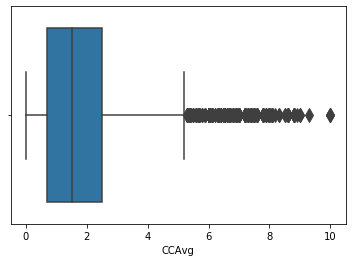

In [18]:
sns.boxplot(data['CCAvg'],fliersize=10)
print("Minimum CCAvg is {}".format(data['CCAvg'].min()))
print("Maximum CCAvg is {}".format(data['CCAvg'].max()))
print("Most frequent CCAvg is {}".format(data['CCAvg'].mode().values[0]))
print("Mean CCAvg is {}".format(data['CCAvg'].mean()))
print("Median CCAvg is {}".format(data['CCAvg'].median()))
print("Inter Quartile range is {}".format(data['CCAvg'].quantile(0.75)-data['CCAvg'].quantile(0.25)))
print("Kurtosis is {}".format(stats.kurtosis(data['CCAvg'])))

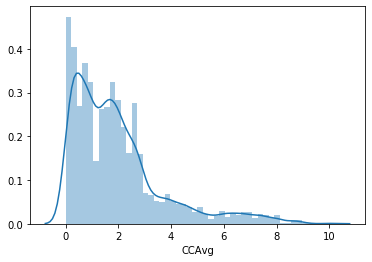

In [19]:
sns.distplot(data["CCAvg"])

The data is normally distributed with a Kurtosis value near to 0 and with 
right skew( tail of the skew extending towards the right) with mean>median>mode.

Credit Card Spend is Distributed between the range of 0 DOllars  and 10,000 Dollars with 108 unique values. 
The mean value of Credit Card Spend per month being 1938 Dollars, 
Most Common Spend around 300 Dollars per month
There are outliers at higher values of Monthly Credit card Expenditure.

# Mortgage

Minimum Mortgage is 0
Maximum Mortgage is 635
Most frequent Mortgage is 0
Mean Mortgage is 56.4988
Median Mortgage is 0.0
Inter Quartile range is 101.0
Kurtosis is 4.75084144430716


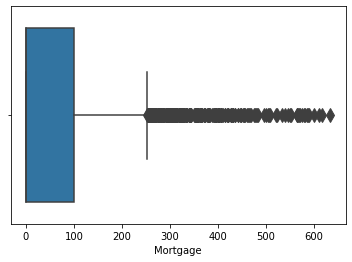

In [20]:
sns.boxplot(data['Mortgage'],fliersize=10)
print("Minimum Mortgage is {}".format(data['Mortgage'].min()))
print("Maximum Mortgage is {}".format(data['Mortgage'].max()))
print("Most frequent Mortgage is {}".format(data['Mortgage'].mode().values[0]))
print("Mean Mortgage is {}".format(data['Mortgage'].mean()))
print("Median Mortgage is {}".format(data['Mortgage'].median()))
print("Inter Quartile range is {}".format(data['Mortgage'].quantile(0.75)-data['Mortgage'].quantile(0.25)))
print("Kurtosis is {}".format(stats.kurtosis(data['Mortgage'])))

In [21]:
print("There are {} Samples with No House Mortgage".format(data[data['Mortgage']==0].Mortgage.count()))

There are 3462 Samples with No House Mortgage


Mortgage has 347 Unique values out of which No/0 Mortgage is the most common one. 
3462/5000 Samples hasnt availed a House Mortgage.
The Maximum mortage availed is 635,000 $  
Because of the large number of 0 values, the mean, median and mode of the sample are affected. 


# Relation Between Attributes

([<matplotlib.axis.YTick at 0x1e9019646d8>,
 <a list of 14 Text yticklabel objects>)

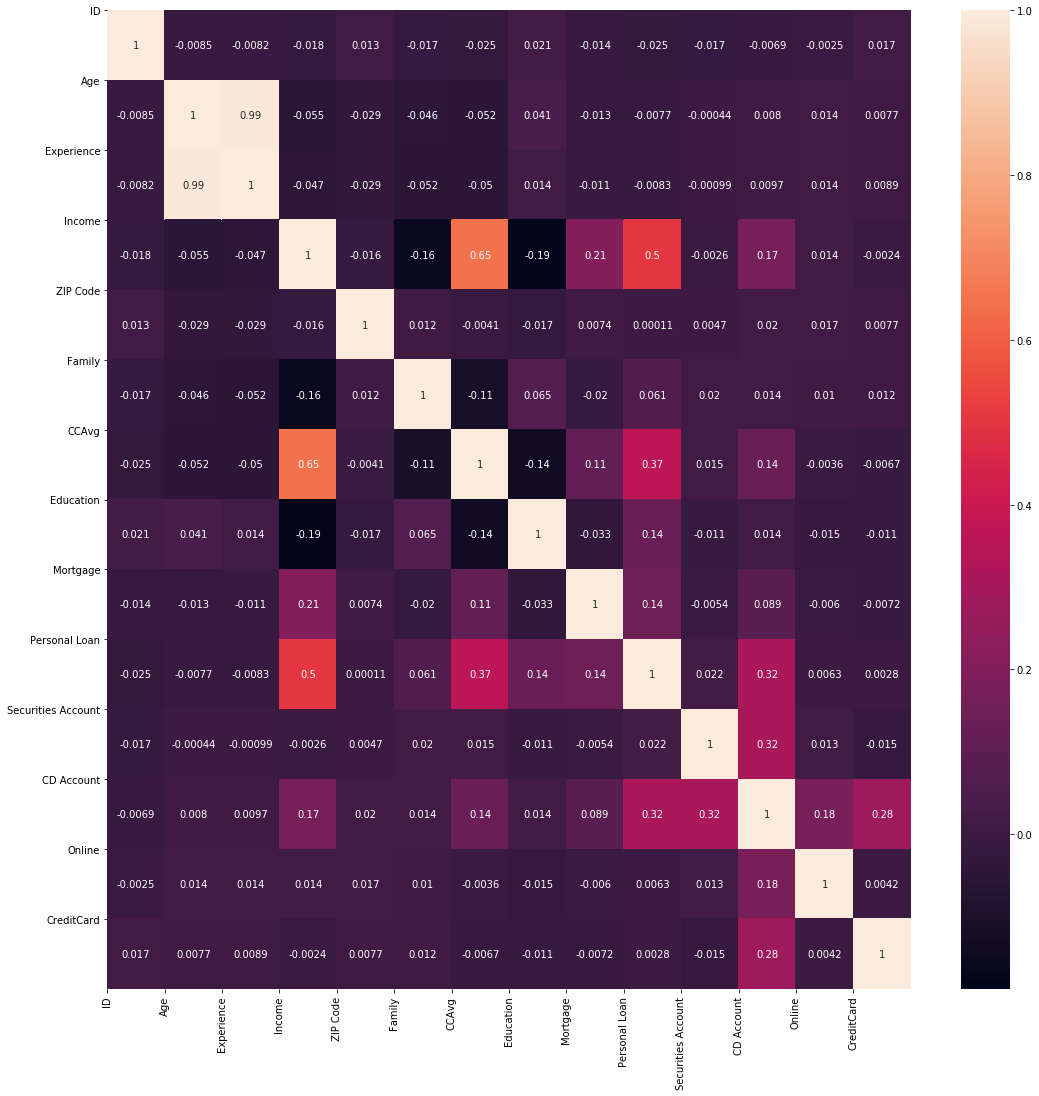

In [24]:
cm=data.corr()
fig,axes=plt.subplots(figsize=(18,18))
sns.heatmap(cm,annot=True)
plt.xticks(range(len(cm.columns)),cm.columns)
plt.yticks(range(len(cm.columns)),cm.columns)

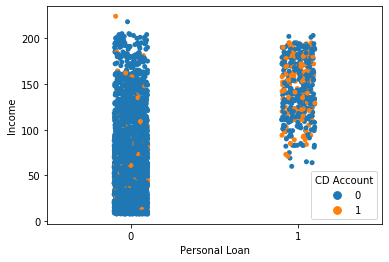

In [30]:
sns.stripplot(data['Personal Loan'],data['Income'],hue=data['CD Account'],jitter=True)

There is a correlation between the CD Account, Personal Loan and Income 
People with CD Account and Income above 75k( approx) are more prone to go for a personal loan. 

# Securities Account, CD, Online and Credit Card

In [35]:
cname=data.columns
for i in ([10,11,12,13]):
    print("{} Samples have {}".format(data[data[cname[i]]==1][cname[i]].count(),cname[i]))
    print("{} Samples do not have {}".format(data[data[cname[i]]==0][cname[i]].count(),cname[i]))

522 Samples have Securities Account
4478 Samples do not have Securities Account
302 Samples have CD Account
4698 Samples do not have CD Account
2984 Samples have Online
2016 Samples do not have Online
1470 Samples have CreditCard
3530 Samples do not have CreditCard


# Target Value

In [36]:
target=data['Personal Loan'].values.reshape(len(data['Personal Loan']),1)
print("{} Samples have Accepted the Loan in previous campaign".format(data[data[cname[9]]==1][cname[9]].count()))
print("{} Samples have not Accepted the Loan in previous campaign".format(data[data[cname[9]]==0][cname[9]].count()))


480 Samples have Accepted the Loan in previous campaign
4520 Samples have not Accepted the Loan in previous campaign


After analysis of the Correlation table, the Personal Data has highest Correlation with the Income,
followed by Credit Card Expenditure, Followed by Cash Deposit. 



# Logistic Regression

In [37]:
Y=data['Personal Loan']
X=data.drop('Personal Loan',axis=1)
X=X.drop('ZIP Code',axis=1)
X=X.drop('ID',axis=1)

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [39]:

from sklearn.linear_model import LinearRegression,LogisticRegression

model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print("Model Score is {}".format(model.score(x_test,y_test)))
y_predict=model.predict(x_test)


Model Score is 0.9453333333333334


Dropping ZIP Code, increasing the prediction accuracy by 4%. 
Dropping ID, further increasing the prediction by 0.1%


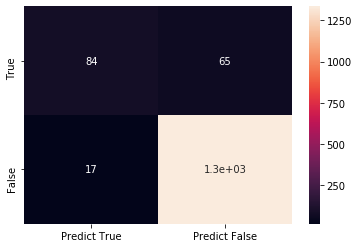

In [40]:
confusion1=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_confusion1=pd.DataFrame(confusion1,index=["True","False"],columns=["Predict True","Predict False"])
sns.heatmap(df_confusion1,annot=True)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=2,interaction_only=True)
x_train_pol=pol.fit_transform(x_train)
x_test_pol=pol.fit_transform(x_test)

In [42]:
model1=LinearRegression()
model1.fit(x_train_pol,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model1.score(x_test_pol,y_test)

0.5671246460571171

Polynomial Features reduces the accuracy with increased complexity. Hence exluding the Polynomial Features for Logistic Regression

# K Nearest Neighbour Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=16,weights='distance')
knn_model.fit(x_train,y_train)
knn_predict=knn_model.predict(x_test)

In [45]:
model.score(x_test,y_test)

0.9453333333333334

In [46]:
'''knn_model_pol=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn_model_pol.fit(x_train_pol,y_train)'''

"knn_model_pol=KNeighborsClassifier(n_neighbors=5,weights='distance')\nknn_model_pol.fit(x_train_pol,y_train)"

In [47]:
'''knn_model_pol.score(x_test_pol,y_test)'''

'knn_model_pol.score(x_test_pol,y_test)'

Polynomial Features reduces the prediction score with increased complexity. Hence excluding the Polynomial Features

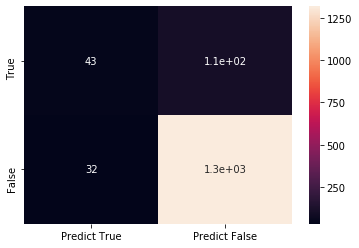

In [48]:
knn_metric=metrics.confusion_matrix(y_test,knn_predict,labels=[1,0])
df_knn=pd.DataFrame(knn_metric,index=["True",'False'],columns=['Predict True','Predict False'])
sns.heatmap(df_knn,annot=True)

# Naive Bayes


In [49]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

nb_model.fit(x_train_pol,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
nb_model.score(x_test_pol,y_test)

0.884

In [51]:
nb_predict=nb_model.predict(x_test_pol)
metrics.accuracy_score(nb_predict,y_test)

0.884

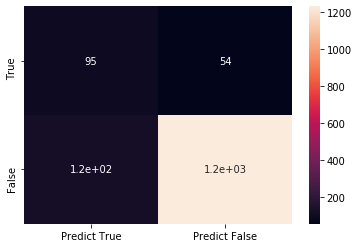

In [52]:
nd_metric=metrics.confusion_matrix(y_test,nb_predict,labels=[1,0])
df_nd_metric=pd.DataFrame(nd_metric,index=['True','False'],columns=['Predict True','Predict False'])
sns.heatmap(df_nd_metric,annot=True)

In [53]:
nd_metric

array([[  95,   54],
       [ 120, 1231]], dtype=int64)

In [54]:
knn_metric

array([[  43,  106],
       [  32, 1319]], dtype=int64)

In [55]:
confusion1

array([[  84,   65],
       [  17, 1334]], dtype=int64)

Comparing the three confusion matrices, the Logistic Regression provides the best Results with 
1. Highest Power of Test
2. Least False Positive Errors
3. Least False Negative Errors
4. Highest True predictions for True values

Hence Logistic Regression is the best Prediction mechanism for this secnario out of the three Different Tests done. 



# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion='entropy',splitter='random')
model_dt.fit(x_train_pol,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [57]:
predict_dt=model_dt.predict(x_test_pol)
model_dt.score(x_test_pol,y_test)

0.9753333333333334

In [58]:
dt_cm=metrics.confusion_matrix(y_test,predict_dt,labels=[1,0])
dt_cm

array([[ 123,   26],
       [  11, 1340]], dtype=int64)

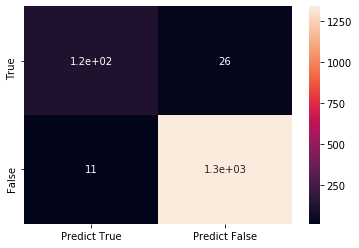

In [59]:
df_dt_cm=pd.DataFrame(dt_cm,index=['True','False'],columns=['Predict True','Predict False'])
sns.heatmap(df_dt_cm,annot=True)

After giving it a try with decision tree, which was the content released this week, it seems that it
has the maximum score of 97, when using it along with Polynomial Features